In [1]:
import os, shutil
#from matplotlib import pyplot as plt


#base_dir = r'C:\Users\Gholamrezaee\Downloads\small_chess_data'
train_dir=r'C:\Users\Gholamrezaee\Downloads\small_chess_data\train'
validation_dir=r'C:\Users\Gholamrezaee\Downloads\small_chess_data\validation'
test_dir=r'C:\Users\Gholamrezaee\Downloads\small_chess_data\test'

King_train_dir=r'C:\Users\Gholamrezaee\Downloads\small_chess_data\train\King'
King_validation_dir=r'C:\Users\Gholamrezaee\Downloads\small_chess_data\validation\King'
King_test_dir=r'C:\Users\Gholamrezaee\Downloads\small_chess_data\test\King'
print('total train king images:' , len(os.listdir(King_train_dir)))
print('total test king images:', len(os.listdir(King_test_dir)))

Bishop_train_dir=r'C:\Users\Gholamrezaee\Downloads\small_chess_data\train\Bishop'
Bishop_validation_dir=r'C:\Users\Gholamrezaee\Downloads\small_chess_data\validation\Bishop'
Bishop_test_dir=r'C:\Users\Gholamrezaee\Downloads\small_chess_data\test\Bishop'
print('total train Bishop images:' , len(os.listdir(Bishop_train_dir)))
print('total test Bishop images:', len(os.listdir(Bishop_test_dir)))


Knight_train_dir=r'C:\Users\Gholamrezaee\Downloads\small_chess_data\train\Knight'
Knight_validation_dir=r'C:\Users\Gholamrezaee\Downloads\small_chess_data\validation\Knight'
Knight_test_dir=r'C:\Users\Gholamrezaee\Downloads\small_chess_data\test\Knight'
print('total train Knight images:' , len(os.listdir(Knight_train_dir)))
print('total test Knight images:', len(os.listdir(Knight_test_dir)))


Pawn_train_dir=r'C:\Users\Gholamrezaee\Downloads\small_chess_data\train\Pawn'
Pawn_validation_dir=r'C:\Users\Gholamrezaee\Downloads\small_chess_data\validation\Pawn'
Pawn_test_dir=r'C:\Users\Gholamrezaee\Downloads\small_chess_data\test\Pawn'
print('total train Pawn images:' , len(os.listdir(Pawn_train_dir)))
print('total test Pawn images:', len(os.listdir(Pawn_test_dir)))


Queen_train_dir=r'C:\Users\Gholamrezaee\Downloads\small_chess_data\train\Queen'
Queen_validation_dir=r'C:\Users\Gholamrezaee\Downloads\small_chess_data\validation\Queen'
Queen_test_dir=r'C:\Users\Gholamrezaee\Downloads\small_chess_data\test\Queen'
print('total train Queen images:' , len(os.listdir(King_train_dir)))
print('total test Queen images:', len(os.listdir(King_test_dir)))




Rook_train_dir=r'C:\Users\Gholamrezaee\Downloads\small_chess_data\train\Rook'
Rook_validation_dir=r'C:\Users\Gholamrezaee\Downloads\small_chess_data\validation\Rook'
Rook_test_data=r'C:\Users\Gholamrezaee\Downloads\small_chess_data\test\Rook'


total train king images: 50
total test king images: 15
total train Bishop images: 50
total test Bishop images: 22
total train Knight images: 50
total test Knight images: 25
total train Pawn images: 50
total test Pawn images: 26
total train Queen images: 50
total test Queen images: 15


In [2]:
from keras import models
from keras import layers
from keras.models import Sequential

model= models.Sequential()

model.add(layers.Conv2D(32,(3,3),activation='relu', input_shape= (150,150,3)))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(64,(3,3),activation='relu'))          
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPooling2D(2,2))          
model.add(layers.Flatten())
model.add(layers.Dense(512,activation='relu'))
model.add(layers.Dense(6,activation='softmax'))
          
model.summary()

Using TensorFlow backend.


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 64)       

In [3]:
from keras import optimizers
model.compile(loss='binary_crossentropy',optimizer=optimizers.RMSprop(lr=0.5),metrics=['acc'])
###lr=le-4

In [18]:
from keras.preprocessing.image import ImageDataGenerator
train_dir=r'C:\Users\Gholamrezaee\Downloads\small_chess_data\train'
validation_dir=r'C:\Users\Gholamrezaee\Downloads\small_chess_data\validation'
test_dir=r'C:\Users\Gholamrezaee\Downloads\small_chess_data\test'

train_data_gen=ImageDataGenerator(rescale=1/255)
test_data_gen=ImageDataGenerator(rescale=1/255)

train_generator=train_data_gen.flow_from_directory(
    train_dir,
    target_size=(150,150),
    batch_size=5,
    class_mode='categorical')

validation_generator=test_data_gen.flow_from_directory(
    validation_dir,
    target_size=(150,150),
    batch_size=5,
    class_mode='categorical')

history=model.fit_generator(
    train_generator,
    steps_per_epoch=5,
    epochs=10,
    validation_data=validation_generator,
    validation_steps=10)

model.save('small_chessman.h5')



Found 299 images belonging to 6 classes.
Found 180 images belonging to 6 classes.
Epoch 1/20
5/5 [==============================] - 19s 4s/step - loss: 4.5112 - acc: 0.7067 - val_loss: 4.1011 - val_acc: 0.7133
Epoch 2/20
5/5 [==============================] - 18s 4s/step - loss: 4.3061 - acc: 0.7200 - val_loss: 5.1264 - val_acc: 0.7133
Epoch 3/20
5/5 [==============================] - 18s 4s/step - loss: 4.3061 - acc: 0.7200 - val_loss: 4.1011 - val_acc: 0.7333
Epoch 4/20
5/5 [==============================] - 18s 4s/step - loss: 3.8960 - acc: 0.7467 - val_loss: 4.1011 - val_acc: 0.7200
Epoch 5/20
5/5 [==============================] - 17s 3s/step - loss: 4.2577 - acc: 0.7222 - val_loss: 5.1264 - val_acc: 0.7267
Epoch 6/20
5/5 [==============================] - 18s 4s/step - loss: 3.8960 - acc: 0.7467 - val_loss: 5.1264 - val_acc: 0.7133
Epoch 7/20
5/5 [==============================] - 17s 3s/step - loss: 4.5112 - acc: 0.7067 - val_loss: 3.0758 - val_acc: 0.7333
Epoch 8/20
5/5 [======

In [16]:
for data_batch , lables_batch in train_generator:
    print('data_batch shape is:',data_batch.shape)
    print('labeles_batch shape is:',lables_batch.shape)
    break

data_batch shape is: (5, 150, 150, 3)
labeles_batch shape is: (5, 6)


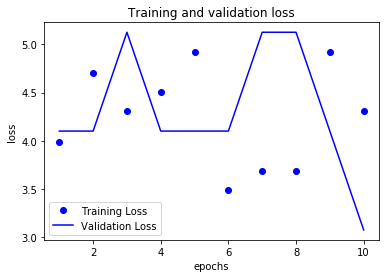

In [11]:
from matplotlib import pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(loss_values)+1)
plt.plot(epochs, loss_values, 'bo', label='Training Loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

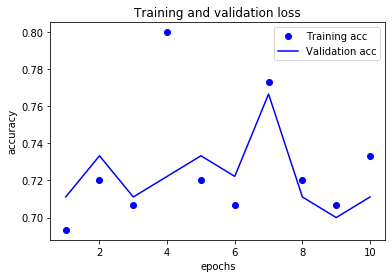

In [17]:
from matplotlib import pyplot as plt

history_dict = history.history
loss_values = history_dict['acc']
val_loss_values = history_dict['val_acc']

epochs = range(1, len(loss_values)+1)
plt.plot(epochs, loss_values, 'bo', label='Training acc')
plt.plot(epochs, val_loss_values, 'b', label='Validation acc')
plt.title('Training and validation loss')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()